In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


✅ Data loaded for EDA
Shape: (1461, 39)
📁 Figures will be saved in: ../figures/EDA

Summary Statistics:


,Date,Close_HDFCBANK.NS,Close_RELIANCE.NS,Close_TCS.NS,Close_^NSEI,High_HDFCBANK.NS,High_RELIANCE.NS,High_TCS.NS,High_^NSEI,Low_HDFCBANK.NS,...,TCS.NS_MA21,TCS.NS_EMA21,TCS.NS_STD21,TCS.NS_RSI,HDFCBANK.NS_Return,HDFCBANK.NS_MA7,HDFCBANK.NS_MA21,HDFCBANK.NS_EMA21,HDFCBANK.NS_STD21,HDFCBANK.NS_RSI
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2022-01-15 05:26:14.537987840,680.979636,1023.243813,2856.162766,16443.974339,687.451970,1034.430144,2884.437254,16533.432819,674.450838,...,2839.002687,2839.092078,69.344532,53.110277,0.000535,680.184443,678.261367,678.296244,16.860396,52.643276
min,2019-01-29 00:00:00,363.573395,395.482483,1448.124512,7610.250000,383.606155,424.985412,1491.576633,8036.950195,349.863021,...,1532.387358,1574.574862,15.903292,7.280821,-0.126069,398.835379,413.129828,421.131917,3.136743,4.513499
25%,2020-07-29 00:00:00,588.006592,863.491882,1998.274414,11940.099609,591.984804,876.029140,2018.697598,12012.549805,582.986597,...,1964.655459,1951.550543,46.721938,39.643992,-0.007266,585.219256,583.017055,584.313679,10.285551,40.875919
50%,2022-01-13 00:00:00,704.106689,1082.996826,2986.108643,16985.699219,710.997471,1094.758925,3017.742097,17126.150391,698.092203,...,2989.821429,2991.024593,63.999557,53.802600,0.000622,705.315404,705.189241,703.760948,14.820576,52.331719
75%,2023-07-06 00:00:00,769.579773,1198.303711,3338.052246,19122.150391,776.123610,1211.458460,3361.766300,19175.250000,764.388612,...,3316.995361,3315.681697,85.224865,65.605686,0.007791,769.601894,770.102530,767.356158,20.721664,64.933461
max,2024-12-31 00:00:00,923.393494,1589.138062,4389.965332,26216.050781,927.463468,1596.980044,4427.080603,26277.349609,916.881553,...,4340.590937,4307.347281,172.177861,97.285043,0.115996,919.978934,902.336461,899.268487,70.009168,94.393965
std,NaN,113.161529,280.516987,750.346731,4396.441430,112.977677,281.852340,754.402319,4403.956159,113.331864,...,746.333332,744.783419,31.000779,16.680078,0.016573,112.567439,111.186365,110.567317,9.530024,16.768204


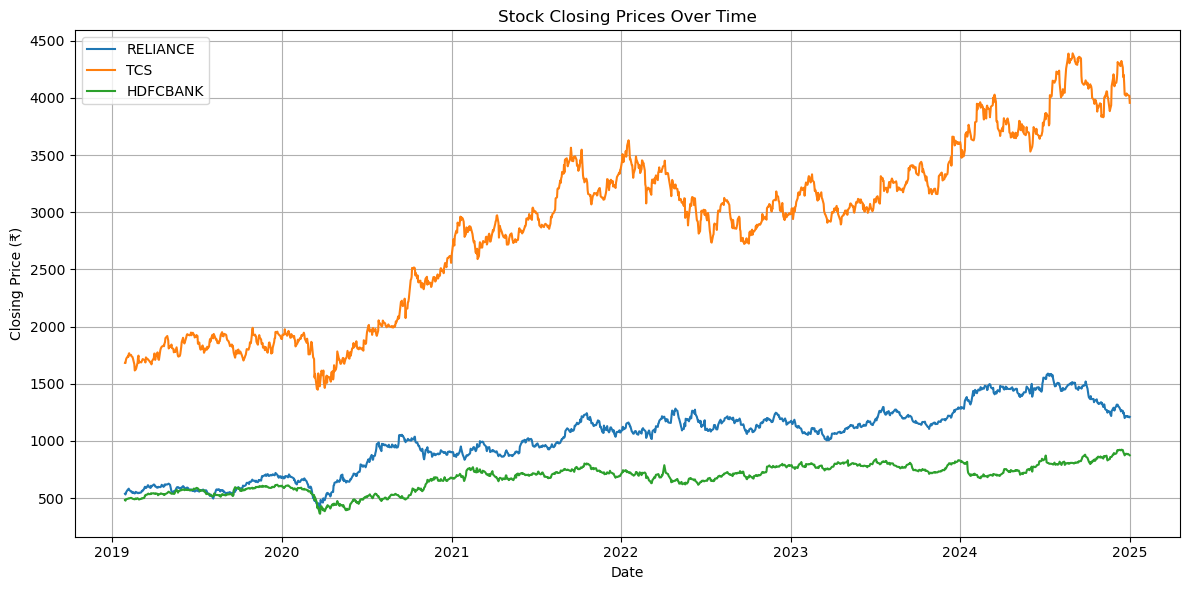

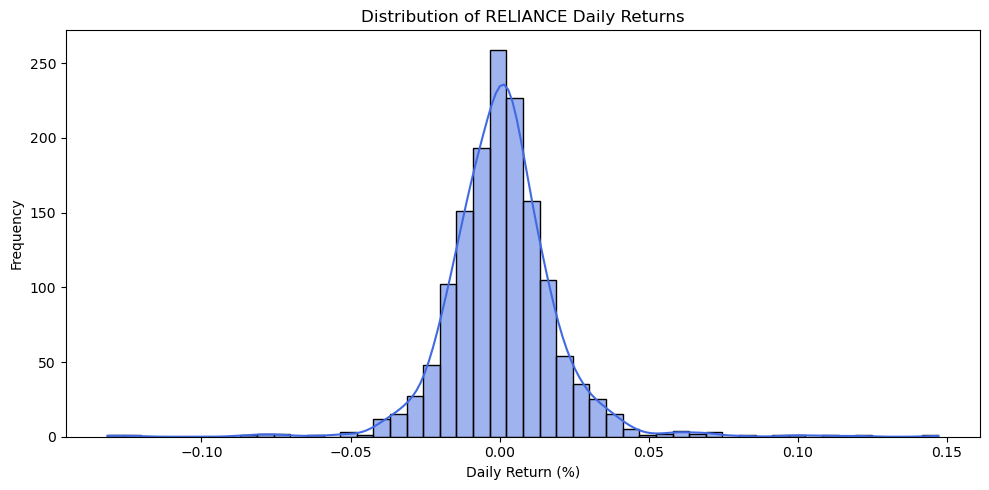

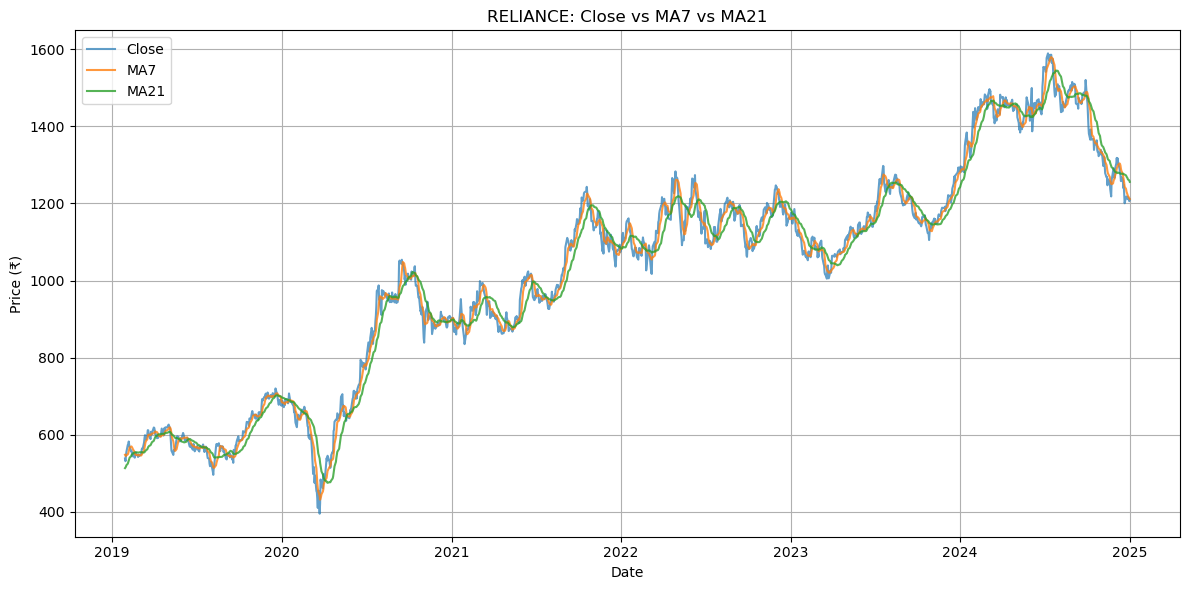

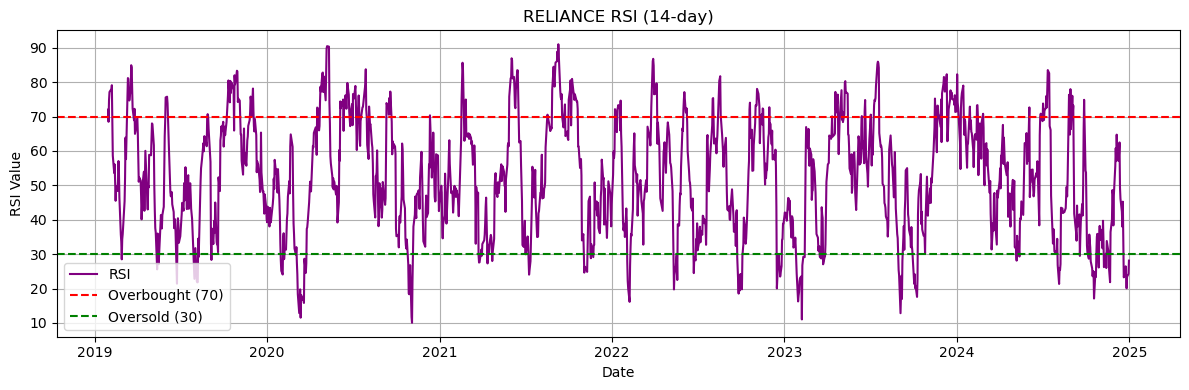

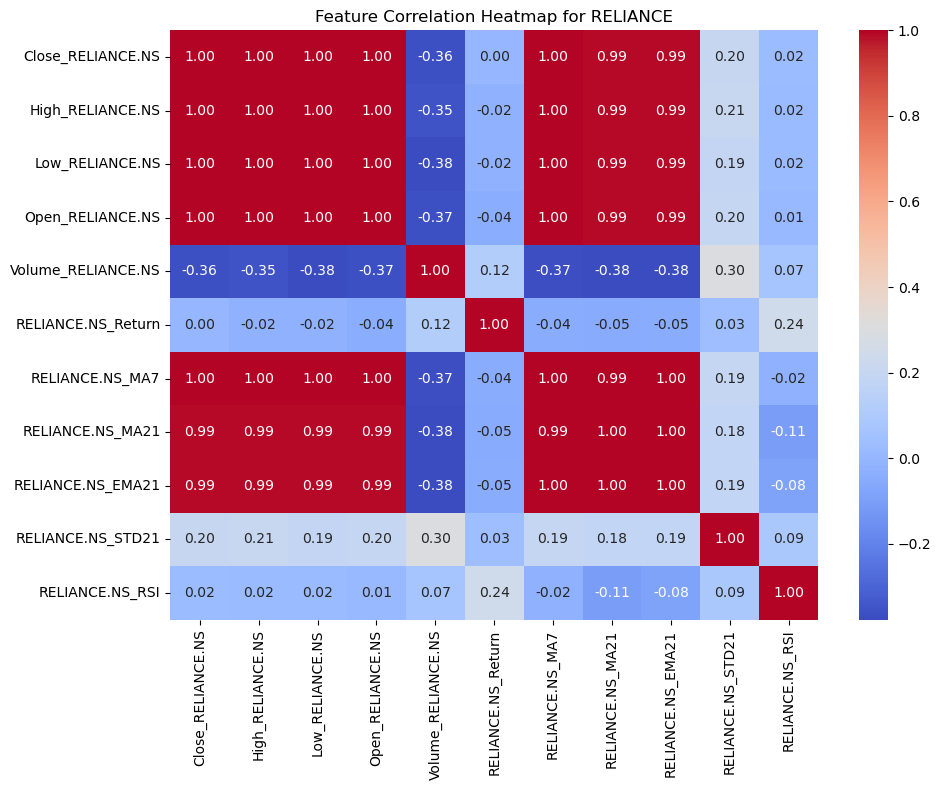


✅ All EDA figures have been saved to: ../figures/EDA


In [3]:
# ============================
# 📊 PHASE 3A: EXPLORATORY DATA ANALYSIS (EDA)
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ----------------------------
# Load dataset
# ----------------------------
data = pd.read_csv('../data/processed/stocks_features.csv', parse_dates=['Date'])
print("✅ Data loaded for EDA")
print("Shape:", data.shape)

# ----------------------------
# Create folder for saving figures
# ----------------------------
fig_dir = '../figures/EDA'
os.makedirs(fig_dir, exist_ok=True)
print(f"📁 Figures will be saved in: {fig_dir}")

# ----------------------------
# Basic info
# ----------------------------
print("\nSummary Statistics:")
display(data.describe())

# ----------------------------
# 1️⃣ Closing Prices Over Time
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close_RELIANCE.NS'], label='RELIANCE')
plt.plot(data['Date'], data['Close_TCS.NS'], label='TCS')
plt.plot(data['Date'], data['Close_HDFCBANK.NS'], label='HDFCBANK')
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'price_trends.png'))
plt.show()

# ----------------------------
# 2️⃣ Distribution of Daily Returns
# ----------------------------
plt.figure(figsize=(10,5))
sns.histplot(data['RELIANCE.NS_Return'], bins=50, kde=True, color='royalblue')
plt.title("Distribution of RELIANCE Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'returns_distribution.png'))
plt.show()

# ----------------------------
# 3️⃣ Moving Averages Comparison
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close_RELIANCE.NS'], label='Close', alpha=0.7)
plt.plot(data['Date'], data['RELIANCE.NS_MA7'], label='MA7', alpha=0.8)
plt.plot(data['Date'], data['RELIANCE.NS_MA21'], label='MA21', alpha=0.8)
plt.title("RELIANCE: Close vs MA7 vs MA21")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'moving_averages.png'))
plt.show()

# ----------------------------
# 4️⃣ RSI Visualization
# ----------------------------
plt.figure(figsize=(12,4))
plt.plot(data['Date'], data['RELIANCE.NS_RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("RELIANCE RSI (14-day)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'RSI.png'))
plt.show()

# ----------------------------
# 5️⃣ Correlation Heatmap
# ----------------------------
plt.figure(figsize=(10,8))
corr = data.filter(like='RELIANCE.NS').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap for RELIANCE")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'correlation_heatmap.png'))
plt.show()

print("\n✅ All EDA figures have been saved to:", fig_dir)
